In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Read Data From CSV File

In [33]:
df= pd.read_csv("heart.csv") 

Handel Null Values

In [34]:
print(df.isnull().sum())

df["restecg"] = df["restecg"].fillna(df["restecg"].mean())

df["oldpeak"] = df["oldpeak"].fillna(df["oldpeak"].mean())

print(df.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     1
thalach     0
exang       0
oldpeak     2
slope       0
ca          0
thal        0
target      0
dtype: int64
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


Scaling Data

In [35]:
from sklearn.preprocessing import MinMaxScaler


In [36]:
EXPERT_DATA=df
EXPERT_DATA = df.copy()

scaler=MinMaxScaler()
df=np.array(df)           # Make it Matrix to Scaling
scaled_data=scaler.fit_transform(df) # Scaling
df=pd.DataFrame(scaled_data , columns=column_names)   # Returned to DF with Cols_titels
print(df.columns)
print(EXPERT_DATA.head())

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0      1.0      168      0      1.0      2   
1   53    1   0       140   203    1      0.0      155      1      3.1      0   
2   70    1   0       145   174    0      1.0      125      1      2.6      0   
3   61    1   0       148   203    0      1.0      161      0      0.0      2   
4   62    0   0       138   294    1      1.0      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


View Correlcation Bettwen Fetures and Target

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


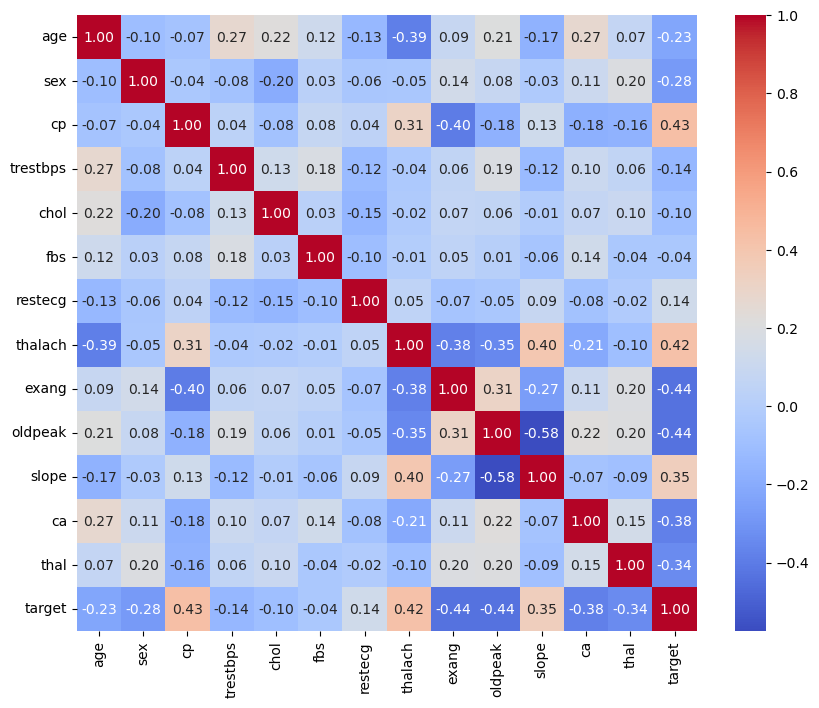

In [7]:
correlation_matrix = df.corr()
print(correlation_matrix.columns)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()


In [9]:
target_correlation = correlation_matrix["target"].abs().sort_values(ascending=False)
selected_features = target_correlation[target_correlation > 0.3].index  
print("Efficted:", selected_features.tolist())

Efficted: ['target', 'exang', 'oldpeak', 'cp', 'thalach', 'ca', 'slope', 'thal']


In [75]:
target_correlation = correlation_matrix["target"].abs().sort_values(ascending=False)
selected_features = target_correlation[target_correlation > 0].index  
print("Efficted:", selected_features.tolist())


Efficted: ['target', 'exang', 'oldpeak', 'cp', 'thalach', 'ca', 'slope', 'thal', 'sex', 'age', 'trestbps', 'restecg', 'chol', 'fbs']


We can Recognized That : 

    1-> ['ca', 'slope', 'thal' ]  Have Good Effict on target

    2-> ['target', 'exang', 'oldpeak', 'cp', 'thalach'] Have more noticeable Effict on target
    
    3-> ['trestbps', 'restecg', 'chol', 'fbs'] have Low effict on target
    
    4-> ['sex', 'age'] have med effect on target


BOX PLOTs

               age          sex           cp     trestbps         chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
mean      0.529878     0.695610     0.314146     0.354827     0.273973   
std       0.189006     0.460373     0.343214     0.165252     0.117791   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.395833     0.000000     0.000000     0.245283     0.194064   
50%       0.562500     1.000000     0.333333     0.339623     0.260274   
75%       0.666667     1.000000     0.666667     0.433962     0.340183   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
mean      0.149268     0.264648     0.596291     0.336585     0.172910   
std       0.356527     0.263836     0.175616     0.472772     0.189493   
min       0.000000     0.000000     0

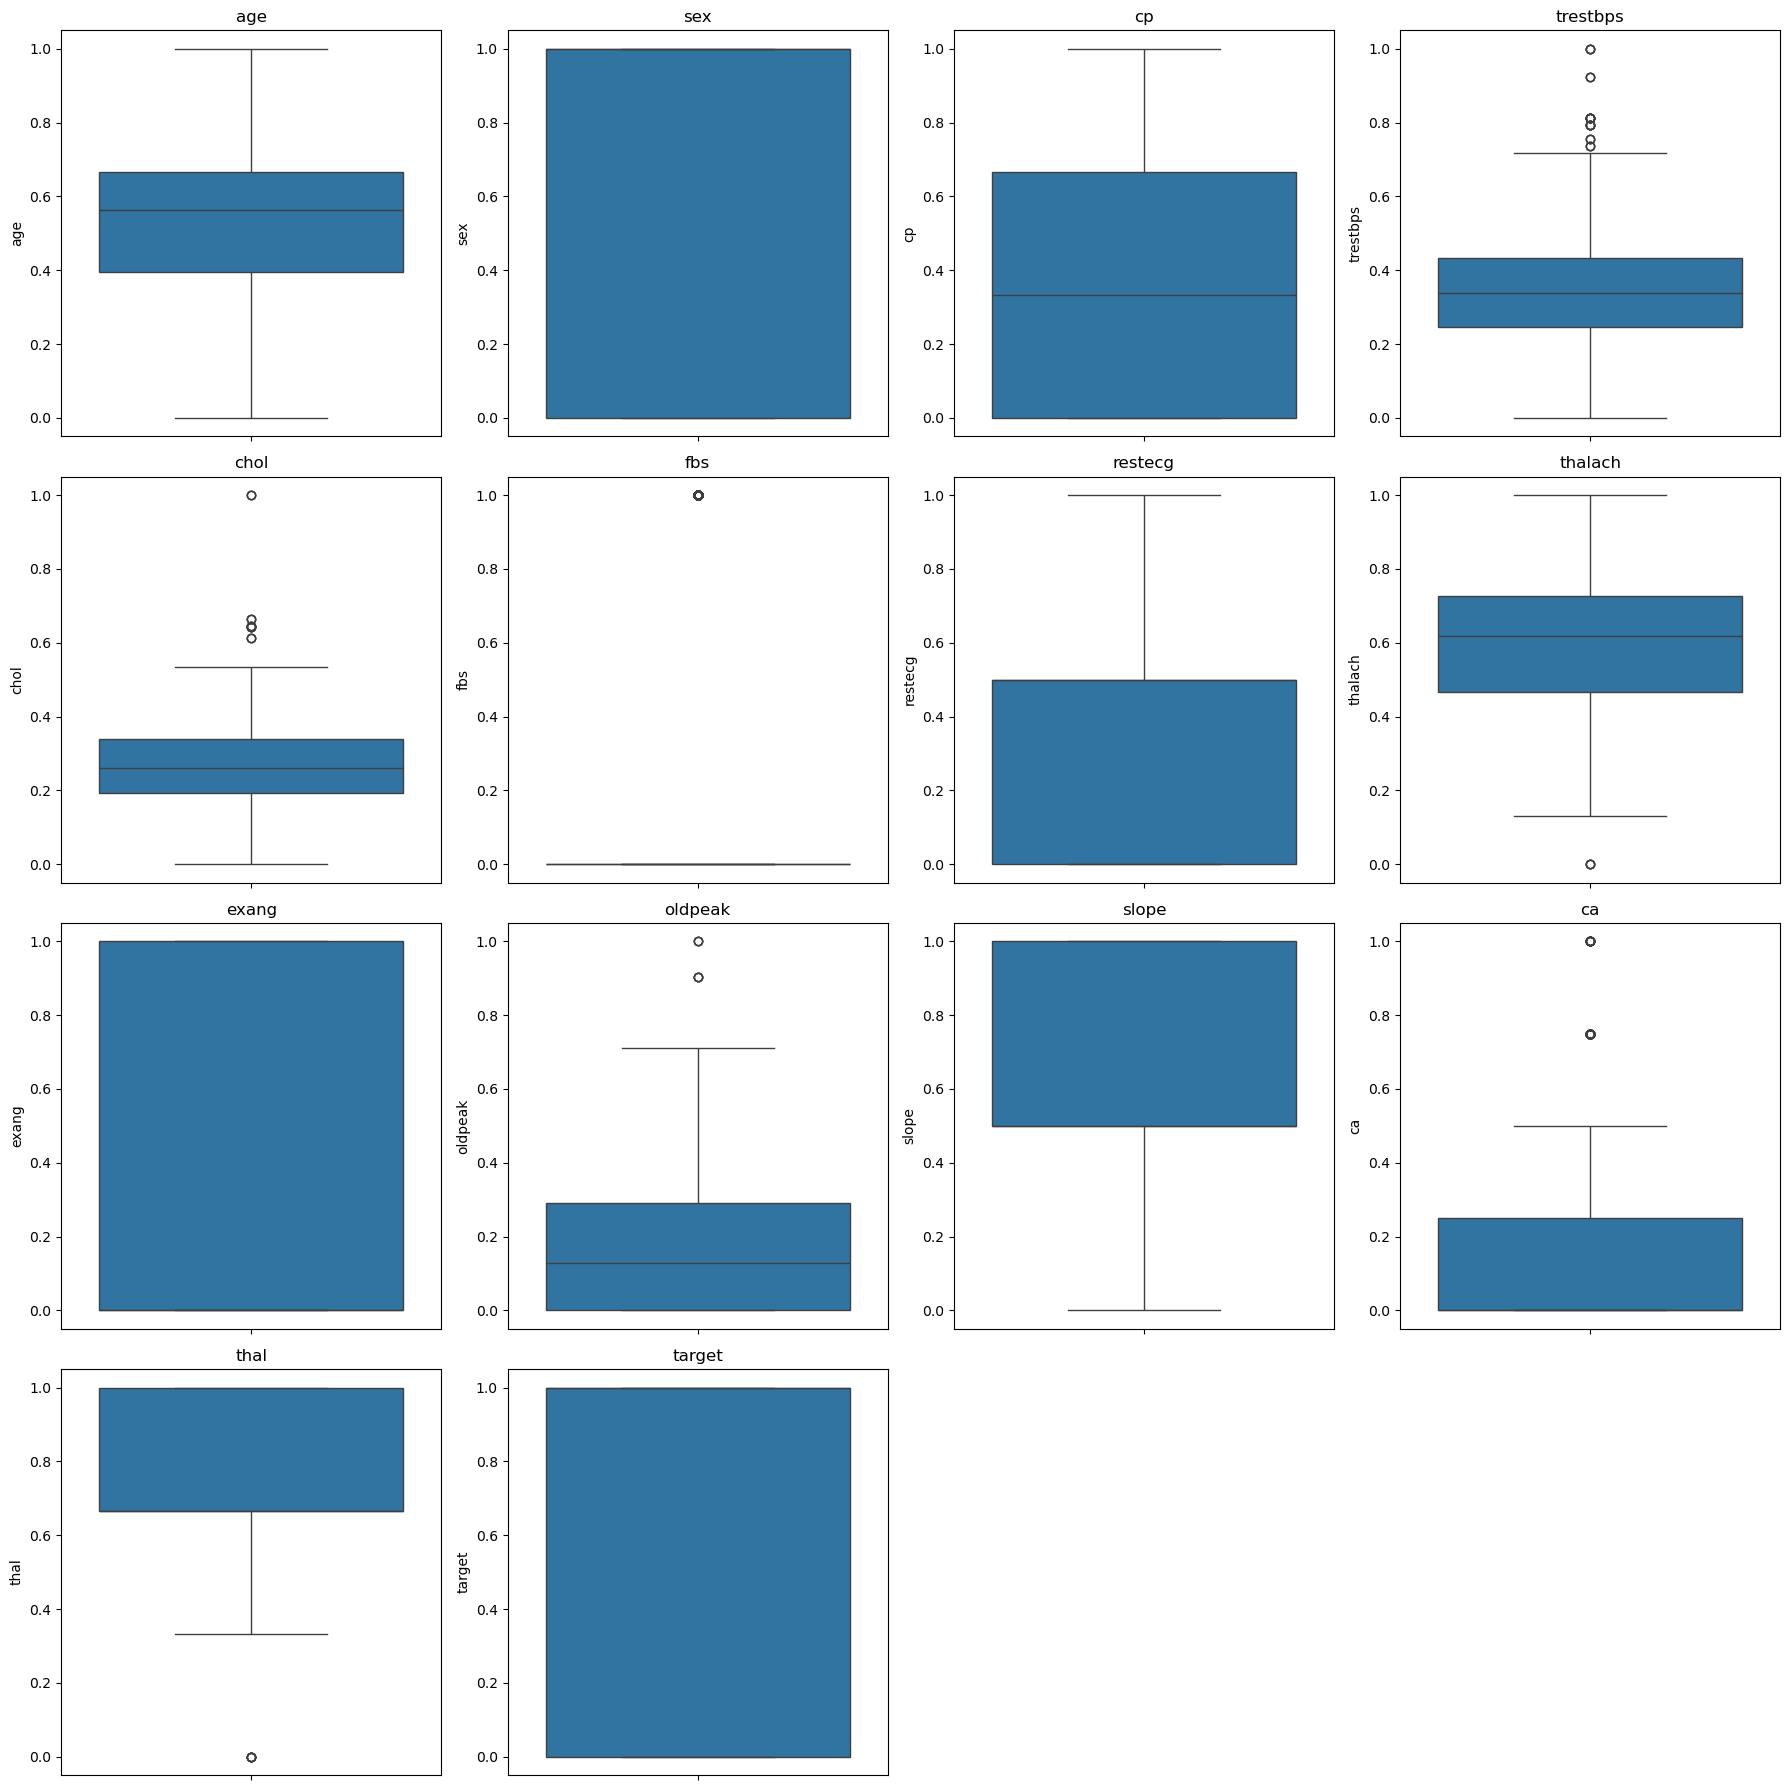

In [12]:
print(df.describe())
plt.figure(figsize=(18,18))
for i, col in enumerate(df, 1):
    plt.subplot(4, 4, i)  
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()  
plt.show()

HistoGrams

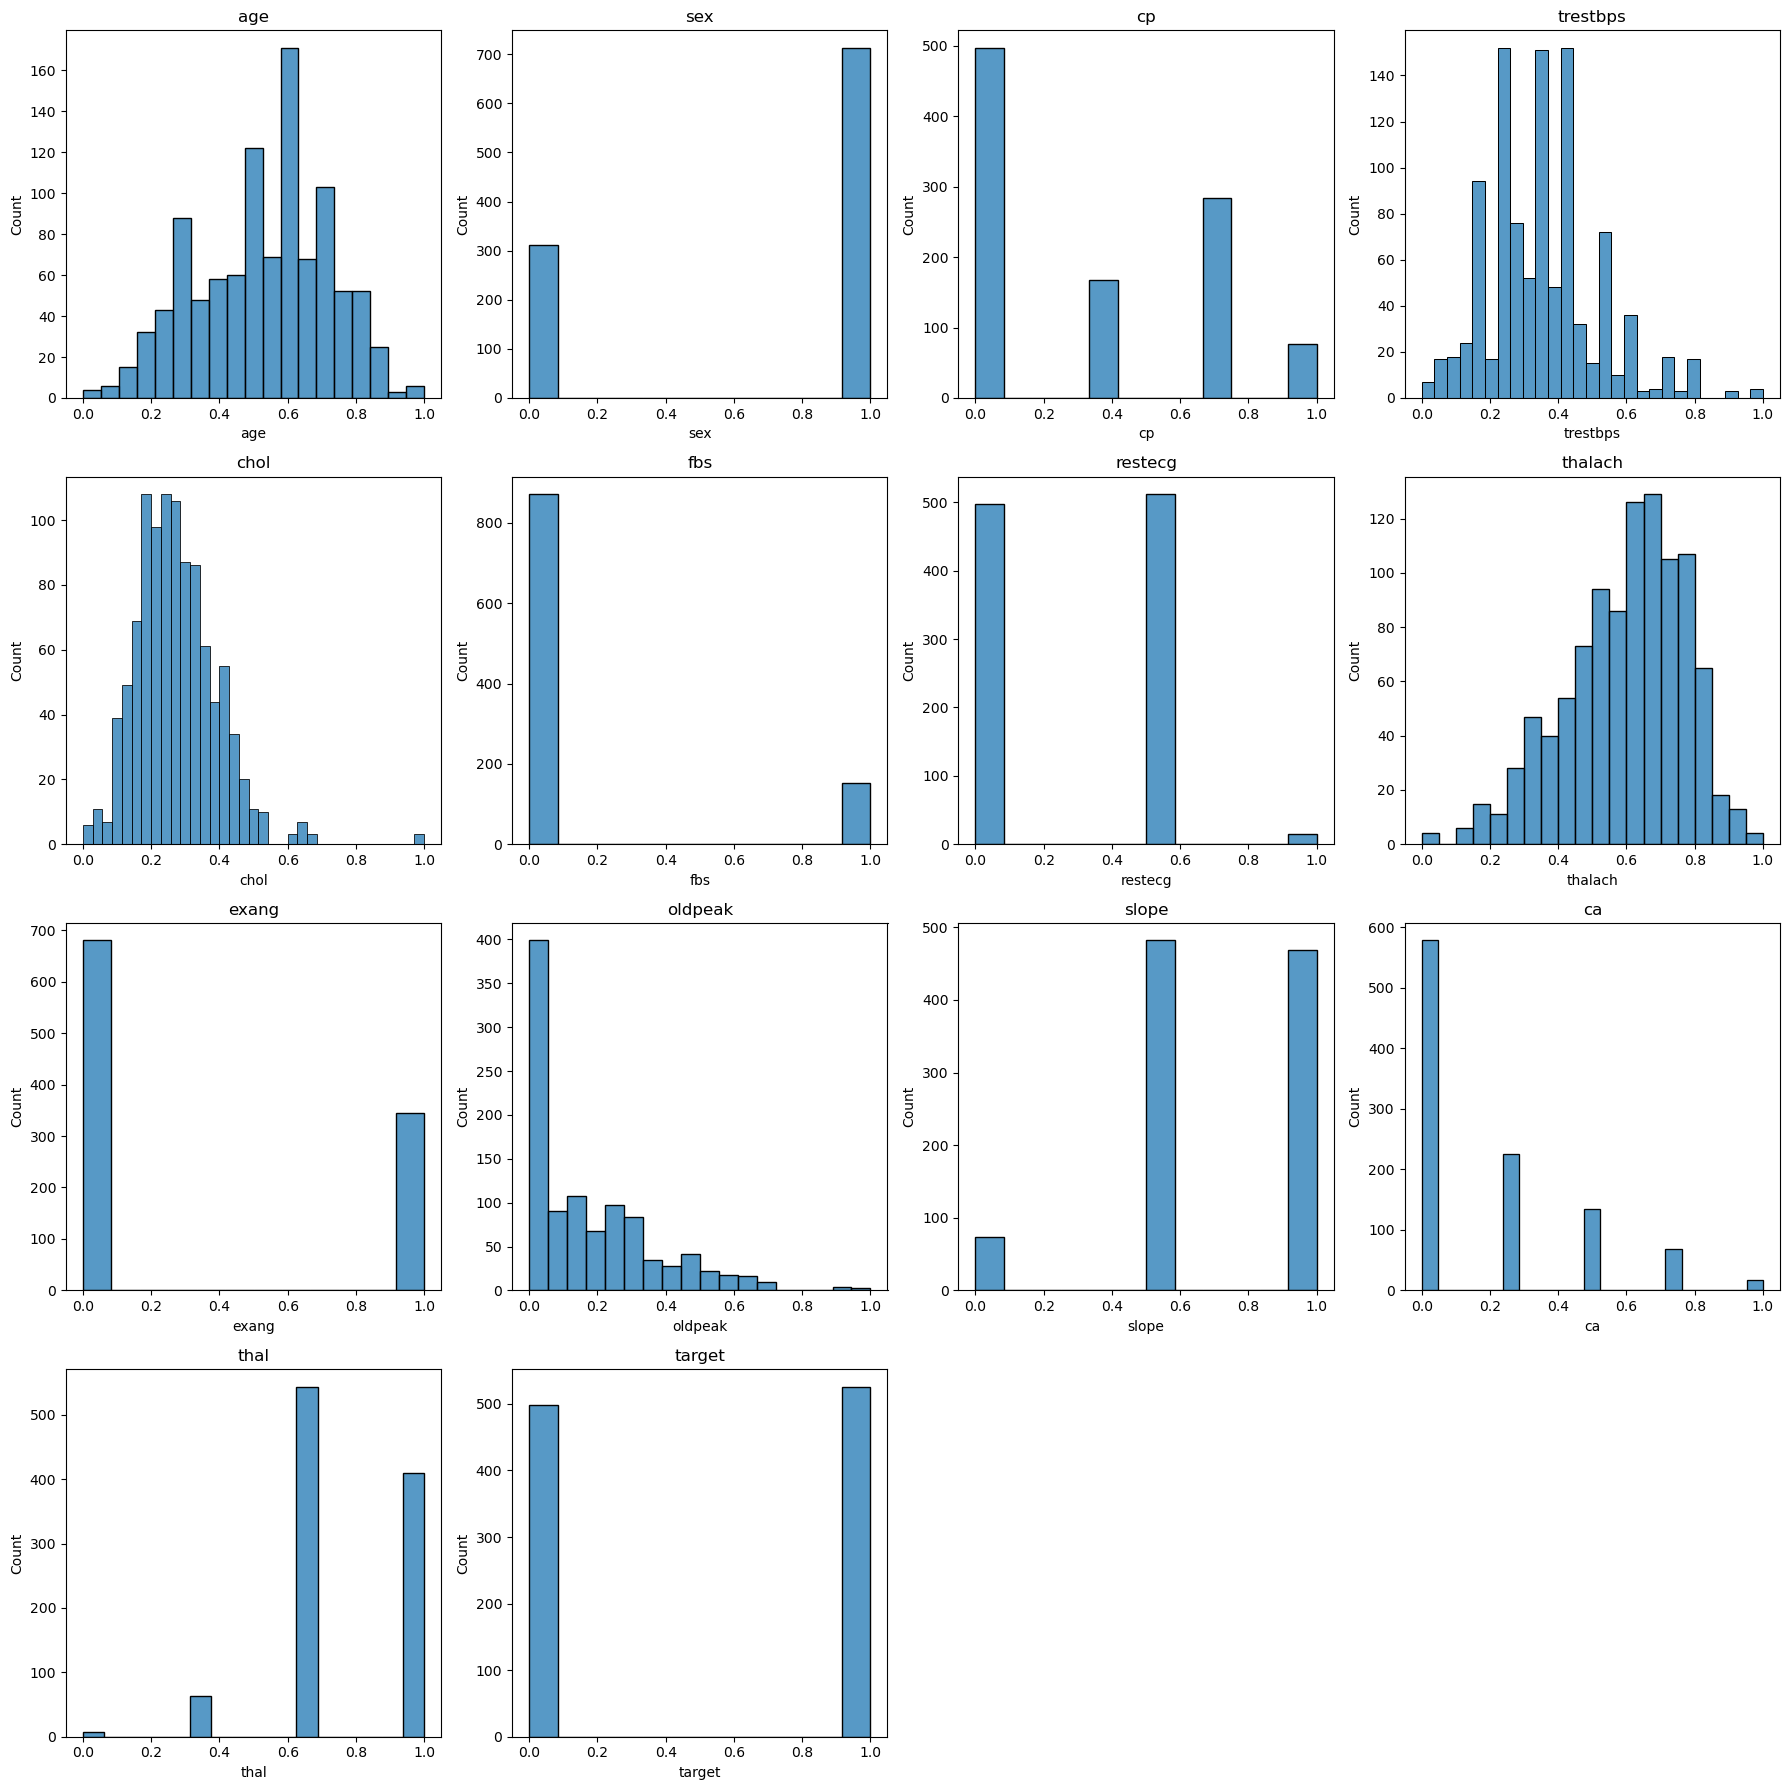

In [76]:
plt.figure(figsize=(18,18))
for i, col in enumerate(df, 1):
    plt.subplot(4, 4, i)  
    sns.histplot(x=df[col])
    plt.title(col)
plt.tight_layout()  
plt.show()

Expert System :

In [14]:
from experta import KnowledgeEngine, Rule, Fact, P


In [72]:
class Heart_Expert(KnowledgeEngine):
    
    @Rule(Fact(trestbps=P(lambda x: x > 140)))
    def high_blood_pressure(self):
        print("Warning: High Blood Pressure (trestbps > 140) -> Potentially Harmful to the Heart <Low Effect>")

    @Rule(Fact(chol=P(lambda x: x > 200)))  
    def high_cholesterol(self):
        print("Warning: High Cholesterol (chol > 200) -> Potentially Harmful to the Heart <Low Effect>")

    @Rule(Fact(thalach=P(lambda x: x < 120)))
    def low_heart_rate(self):
        print("Warning: Low Heart Rate (thalach < 120) -> Bad Heart Functionality <High Effect>")

    @Rule(Fact(fbs=P(lambda x: x > 120)))  
    def high_fbs(self):
        print("Warning: High Fasting Blood Sugar (fbs > 120) -> Potentially Harmful to the Heart <Low Effect>")

    @Rule(Fact(oldpeak=P(lambda x: x > 1)))
    def high_oldpeak(self):
        print("Warning: High Oldpeak (oldpeak > 1) -> Bad Heart Functionality <High Effect>")

    @Rule(Fact(ca=P(lambda x: x > 2)))  
    def high_ca(self):
        print("Warning: High Calcium Score (ca > 2) -> Bad Heart Functionality <Mid-Normal Effect>")

    @Rule(Fact(cp=P(lambda x: x == 3)))
    def high_cp(self):
        print("Warning: Chest Pain Type 3 (cp == 3) -> Bad Heart Functionality <High Effect>")

    @Rule(Fact(exang=P(lambda x: x == 1)))
    def exercise_angina(self):
        print("Warning: Exercise-Induced Angina Detected (exang == 1) -> Bad Heart Functionality <High Effect>")

    
    @Rule(Fact(exang=P(lambda x: x == 1)), Fact(oldpeak=P(lambda x: x > 1)))
    def exang_oldpeak_high_risk(self):
        print("High Warning!!: Combination of Exercise-Induced Angina & High Oldpeak -> Consult a Doctor!!")

    @Rule(Fact(thalach=P(lambda x: x < 120)), Fact(cp=P(lambda x: x == 3)))
    def thalach_cp_high_risk(self):
        print("High Warning!!: Low Heart Rate & Chest Pain Type 3 -> Consult a Doctor!!")

    @Rule(Fact(thalach=P(lambda x: x < 120)), Fact(cp=P(lambda x: x == 3)), 
          Fact(exang=P(lambda x: x == 1)), Fact(oldpeak=P(lambda x: x > 1)))
    def multiple_risk_factors(self):
        print("Critical Warning!!: Multiple High-Risk Factors Detected (oldpeak, exang, thalach, cp) -> Urgent Medical Attention Required!!")

    @Rule(Fact(slope=P(lambda x: x == 1)), Fact(oldpeak=P(lambda x: x > 1)))
    def slope_oldpeak_high_risk(self):
        print("Warning: Flat Slope & High Oldpeak -> Increased Risk of Heart Disease")

    @Rule(Fact(target=1))
    def heart_disease(self):
        print("Diagnosis: This Patient Has Heart Disease")

    @Rule(Fact(target=0))
    def no_heart_disease(self):
        print("Diagnosis: This Patient Does Not Have Heart Disease")



In [79]:
engine=Heart_Expert()
engine.reset()
Patient = EXPERT_DATA.iloc[1].to_dict()
print(Patient)

for key, value in Patient.items():
    engine.declare(Fact(**{key: value}))


engine.run()

{'age': 53.0, 'sex': 1.0, 'cp': 0.0, 'trestbps': 140.0, 'chol': 203.0, 'fbs': 1.0, 'restecg': 0.0, 'thalach': 155.0, 'exang': 1.0, 'oldpeak': 3.1, 'slope': 0.0, 'ca': 0.0, 'thal': 3.0, 'target': 0.0}
Diagnosis: This Patient Does Not Have Heart Disease
High Warning!!: Combination of Exercise-Induced Angina & High Oldpeak -> Consult a Doctor!!


Split Data

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
x = df.drop(columns=["target"])     
y = df["target"]     

In [47]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(y_train)


835    0.0
137    1.0
534    1.0
495    1.0
244    1.0
      ... 
700    1.0
71     0.0
106    0.0
270    1.0
860    0.0
Name: target, Length: 820, dtype: float64


Dicision Tree Model

In [48]:
from sklearn.tree import DecisionTreeClassifier

In [49]:
DTC = DecisionTreeClassifier()

WithOut ["Max_depth" and "min_samples_split"]

In [50]:
DTC.fit(x_train, y_train)


DecisionTreeClassifier()

In [51]:
y_pred= DTC.predict(x_test)

In [52]:
from sklearn import metrics

In [54]:
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred, average='weighted')  # أو 'macro' حسب الحاجة
recall = metrics.recall_score(y_test, y_pred, average='weighted')
f1 = metrics.f1_score(y_test, y_pred, average='weighted')


In [55]:
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Accuracy: 0.9854
Precision: 0.9858
Recall: 0.9854
F1-score: 0.9854


With ["Max_depth" and "min_samples_split"]

In [86]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [87]:
param_dist = {
    'max_depth': randint(3, 20),  # قيم عشوائية بين 3 و 20
    'min_samples_split': randint(2, 15)  # قيم عشوائية بين 2 و 15
}

random_search = RandomizedSearchCV(DTC, param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=42)



In [88]:
random_search.fit(x_train, y_train)


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002831E6BF380>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002831E6BC8C0>},
                   random_state=42, scoring='accuracy')

In [89]:
print( random_search.best_params_)

{'max_depth': 9, 'min_samples_split': 5}


We Recognized that -> {'max_depth': 9, 'min_samples_split': 5}

In [90]:
y_pred= random_search.predict(x_test)

In [91]:
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred, average='weighted')  
recall = metrics.recall_score(y_test, y_pred, average='weighted')
f1 = metrics.f1_score(y_test, y_pred, average='weighted')


In [92]:
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Accuracy: 0.9707
Precision: 0.9724
Recall: 0.9707
F1-score: 0.9707


Without determine [depth and min_simple_split]:
    Predition is Better